### In this Series notebook, I want to teach you practical time series analysis from scratch.

In my opinion for doing time series task R programming is better than python because R has different packages for doing time series tasks.<br/>

In the first notebook of the time series course, I want to introduce you to an important library for handling time series features.



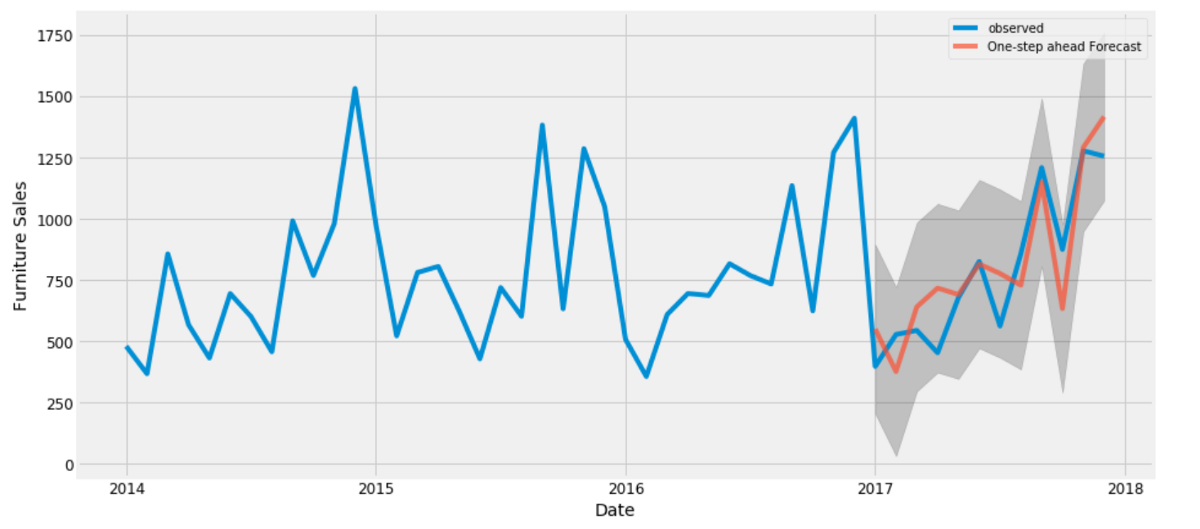

In [1]:
# Required Libraray 
library(fpp3) # I will introduce later
library(ggplot2) # for Assume plot
library(lubridate) # for work with dates and times

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.4      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



# Work with lubridate
### We have a few good functions in lubridate for tickling with time.

In [2]:
today()

[1] "2021-07-07"

In [3]:
now()

[1] "2021-07-07 06:15:47 UTC"

In [4]:
x = '2014-10-22'
print(x)
print(class(x))
print('---------------------')
# Change Class of character to time object
y = as.Date(x)
print(y)
print(class(y))

[1] "2014-10-22"
[1] "character"
[1] "---------------------"
[1] "2014-10-22"
[1] "Date"


In [5]:
dt = as.Date('11/1/2005', format = '%m/%d/%Y')
dt

[1] "2005-11-01"

In [6]:
dt1 = as.Date('Aug 23, 2021', format = '%B %d, %Y')
dt1

[1] "2021-08-23"

In [7]:
# Difference Between to time object in day
as.numeric(dt1 - dt)

[1] 5774

## POSIXct for time component

In [8]:
tm1 = as.POSIXct('2013-12-21 11:00:02')
tm1

tm2 = as.POSIXct('2010-12-01 11:42:03', tz = 'GMT')
tm2

tm1 - tm2

[1] "2013-12-21 11:00:02 UTC"

[1] "2010-12-01 11:42:03 GMT"

Time difference of 1115.971 days

In [9]:
ymd(20170102) # ymd meaning that (year, month, day)
ymd('2017-01-31')


mdy('January 31st, 2019')
dmy('31-Aug-2011')

[1] "2017-01-02"

[1] "2017-01-31"

[1] "2019-01-31"

[1] "2011-08-31"

In [10]:
# Work With a dataset which we call it data
# In this dataset we record NDMI index over time, no matter column NDMI what exactly is.
data = read.csv('../input/time-series-dataset-for-section-1/data1.csv')
head(data)

,X,Date,NDMI
,<int>,<chr>,<dbl>
1,1,1-Aug-02,-0.06780933
2,2,1-Aug-04,-0.20731620
3,3,1-Aug-07,-0.14506107
4,4,1-Aug-93,-0.01626674
5,5,1-Jul-01,-0.13652831
6,6,1-Jul-05,0.07205675


In [11]:
# Remove first column which indecates row number
data = data[, -1]

In [12]:
str(data)

'data.frame':	752 obs. of  2 variables:
 $ Date: chr  "1-Aug-02" "1-Aug-04" "1-Aug-07" "1-Aug-93" ...
 $ NDMI: num  -0.0678 -0.2073 -0.1451 -0.0163 -0.1365 ...


In [13]:
# Add some features to our dataset
data$date = dmy(data$Date)
data$year = year(data$date)
data$month = month(data$date)
head(data)



,Date,NDMI,date,year,month
,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,1-Aug-02,-0.06780933,2002-08-01,2002,8
2,1-Aug-04,-0.20731620,2004-08-01,2004,8
3,1-Aug-07,-0.14506107,2007-08-01,2007,8
4,1-Aug-93,-0.01626674,1993-08-01,1993,8
5,1-Jul-01,-0.13652831,2001-07-01,2001,7
6,1-Jul-05,0.07205675,2005-07-01,2005,7


In [14]:
# We use aggregate() function to prepare dataset for plotting and time series analysis
ndmia = aggregate(NDMI ~ year + month, data, mean)
ndmia
class(ndmia)

year,month,NDMI
<dbl>,<dbl>,<dbl>
1993,5,-0.096585757
1994,5,-0.046527188
1995,5,-0.095456004
1996,5,-0.032833949
1997,5,-0.047770572
1998,5,-0.065879725
1999,5,-0.129894468
2000,5,-0.132418059
2001,5,-0.142455796


[1] "data.frame"

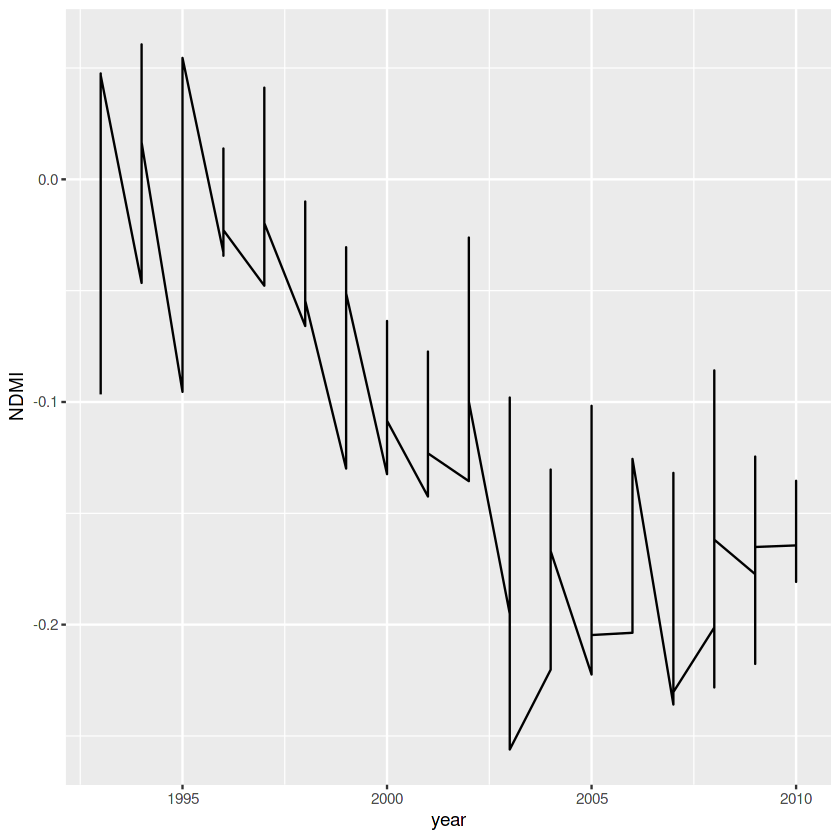

In [15]:
ggplot(ndmia, aes(x = year, y = NDMI)) + 
 geom_line()

### If have any question, write a comment and I will answer you as soon as possible